# GA Data Science 18 (DAT18) - Lab5

### Plotting and KNN



# 1. Plotting Apple Stock Prices

In [12]:
import pandas.io.data
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,124.820000,125.120003,123.099998,124.250000,40621400,122.650597
2015-04-02,125.029999,125.559998,124.190002,125.320000,32220100,123.706823
2015-04-06,124.470001,127.510002,124.330002,127.349998,37194000,125.710691
2015-04-07,127.639999,128.119995,125.980003,126.010002,35012300,124.387944
2015-04-08,125.849998,126.400002,124.970001,125.599998,37329200,123.983218


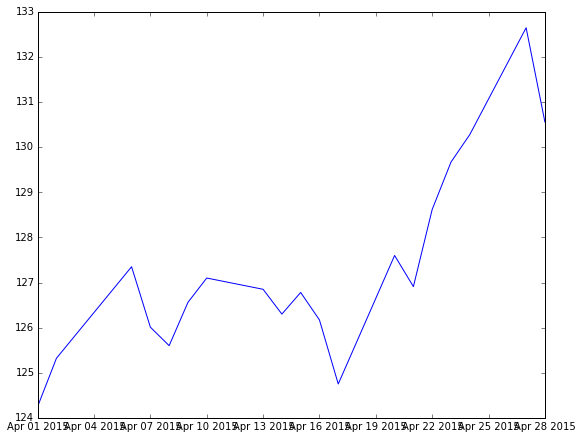

In [15]:
fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(2,2,1)
ax.plot(aapl.index, aapl['Close'])

##Wait... what just happened: 

we got some stock price info from yahoo directly through some [pandas magic](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)! And then plotted a simple line graph of the close price by referencing a single column
 


In [16]:
#use shift tab to find out more
pd.io.data.get_data_yahoo()

TypeError: object of type 'NoneType' has no len()

In [6]:
#Whats that datetime business
datetime.datetime(2015, 4, 1)

datetime.datetime(2015, 4, 1, 0, 0)

### Some subplots to show whats possible

In [ ]:
fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(2,2,1)
ax.plot(aapl.index, aapl['Close'])
ax.set_title('Line plots', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(aapl['Close'], 'o')
ax.set_title('Scatter plots', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(normal_dist, bins=50)
ax.set_title('Histograms', size=24)
ax.set_xlabel('count', size=16)


mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, 1000)
ax = fig.add_subplot(2,2,4)
ax.boxplot(normal_dist)
ax.set_title('Boxplots', size=24)

-------------
#### Now let's check out bokeh

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.

In [ ]:
from bokeh.plotting import figure, output_notebook,show
output_notebook()

In [17]:
# prepare some data
x = aapl.Low
y = aapl['High']

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# add a line renderer with legend and line thickness
p.circle(x, y, legend="High vs. Low", line_width=2)

# show the results
show(p)

NameError: name 'figure' is not defined

### Exercise 1: 

On your own (using Bokeh or Matplotlib). Do the following: 

1. Get the open and close dates for facebook's stock price (Ticker=FB) for the same date range as we used for APPL
2. Join the close prices for each stock into a single dataframe
3. Use a scatter plot to see if there is a relationship between apples close price and facebook's close price. 

In [7]:
#Your code here:
fb = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))
fb.head()





,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,82.500000,82.720001,80.870003,81.669998,22058200,81.669998
2015-04-02,82.250000,82.559998,81.440002,81.559998,19664100,81.559998
2015-04-06,80.800003,82.809998,80.800003,82.440002,19062900,82.440002
2015-04-07,82.650002,83.419998,82.220001,82.320000,17467000,82.320000
2015-04-08,82.629997,83.099998,81.839996,82.279999,18966700,82.279999


In [31]:
aapl.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,124.82,125.120003,123.099998,124.25,40621400,122.650597


In [32]:
fb.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,82.5,82.720001,80.870003,81.669998,22058200,81.669998


In [36]:
fb.join['fb.Close','aapl.Close']

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [35]:
fb[['Close']]
aapl[['Close']]

,Close
Date,
2015-04-01,124.250000
2015-04-02,125.320000
2015-04-06,127.349998
2015-04-07,126.010002
2015-04-08,125.599998
2015-04-09,126.559998
2015-04-10,127.099998
2015-04-13,126.849998
2015-04-14,126.300003


In [29]:
new_df = df.['fb.Close', 'aapl.Close']

SyntaxError: invalid syntax (<ipython-input-29-e99701ce0d99>, line 1)

In [28]:
print new_df

['fb.Close', 'aapl.Close']


______________
# 2. SkLearn: Using datasets and KNN

Where do we find Machine Learning algorithms in python?

    sklearn - http://scikit-learn.org/stable/

Scikit Learn is a large collection of tools for data mining & data analysis. It contains the base algorithms for many machine learning strategies and also has very developed data processing and model selection capabilities. A large amount of complex products can be built using sklearn.

In [48]:
# load the data
iris = pd.read_csv('data/iris.csv')

What does the sk_iris data set look like?

In [49]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
#How many different types of iris are there? 
iris.iris_type.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Exercise:

Using the data cleaning we have learned thus far. do the following:

Create a new column called 'target' that holds the value 0 if the row is a setosa, 1 if its versicolor, 2 if its virginica. 
hint: Write a custom function and use apply

In [52]:
def convert_type(x):
    if x == 'setosa':
        return 0
    if x == 'versicolor':
        return 1
    else:
        return 2

iris['target'] = iris['iris_type'].apply(convert_type)
iris.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Inspecting Data Visually

In [ ]:
from bokeh.plotting import figure,output_notebook,show,VBox,HBox,gridplot 
import numpy as np
import pandas as pd

#display matplotlib items in the notebook (used with pd.DataFrame.plot())
%matplotlib inline 
output_notebook() #display bokeh visuals within the notebook 

As a dataframe we can do some quick exploration and understand more about our data. 

In [ ]:
iris.plot(kind="scatter",x=1,y=2,c='r',title="Base Visual")

But something is missing here. We have what we'd call **labelled data**. So even though our data all exists in one column, some of this data has been labelled with scientific names for irises. We can also call this the "target" data, or the target label we use to classify our data. To work with labels, we need to utilize the targets column of our original dataset.

In [ ]:
iris['target']

In [ ]:
# We have three possible values: 0, 1, or 2. We can construct a vector of colors to 
# make our plot easier to read.

colors = []
for target in iris['target']:
    if target == 0:
        colors.append('red')
    elif target == 1:
        colors.append('orange')
    elif target == 2:
        colors.append('blue')
print colors

In [ ]:
#another way to build that list, using list comprehensions:
colorMap = {0:'red',1:'orange',2:'blue'}
colors = [ colorMap[x] for x in iris['target'] ]
print colors

In [ ]:
#We can pass our list of colors to the plot like so to get a better visual of what's going on.

iris.plot(kind='scatter',x=3,y=1,c=colors)

Great start but if we want a more advanced, prettier visualization, let's use Bokeh.

In [ ]:
feat_x = iris.columns[1]
feat_y = iris.columns[3]

p1 = figure(plot_width=400, plot_height=400, 
            x_axis_label=feat_x, y_axis_label=feat_y)
p1.circle(iris[feat_x], iris[feat_y], line_width=1, color=colors, alpha=0.4,size=8)

show(p1)

Notice that with alpha setting a transparency on our data, we can see where some data overlaps and also bolder colors represent more data points at that spot.

This is only 1 of many plots we can make. Let's generate the entire set programmatically!

In [ ]:
plots = []
for feat_x in iris.columns:
    for feat_y in iris.columns:
        
        temp_p = figure(plot_width=200, 
                        plot_height=200, 
                        x_axis_label=feat_x, 
                        y_axis_label=feat_y
                       )
        temp_p.circle(iris[feat_x], 
                      iris[feat_y], 
                      line_width=1, 
                      color=colors, 
                      alpha=0.4,
                      size=5)
        
        temp_p.xaxis.axis_label_text_font_size = '9pt'
        temp_p.yaxis.axis_label_text_font_size = '9pt'

        plots.append(temp_p)

# gridplot takes nested lists of bokeh figures and arranges them on the grid in the positions given. 
# Passing None inserts a blank.

sqrt = len(plots)**0.5
gplots = np.array(plots).reshape(sqrt,sqrt)

# To convert to a square, we reshape the array into a grid with the # of rows equal to the # of columns. 

#REMEMBER: gridplot takes a list of lists, so we convert gplots with the .tolists() method
a = gridplot(gplots.tolist())
show(a)


This is a very quick way to visually inspect your data.

# 3. KNN

Part of the big step with this lab is understanding general sklearn syntax. Each family of algorithms have various knobs and levers to tune it appropriately but there is a general overall structure to these models that will help you as you move forward.
1. All models need to be trained. Sklearn models have a `.fit` method for doing so.
2. We need to use the model to make a guess. the `.predict` method takes data and returns the model's guess for the value. Stipulations around this pertain to the specific model.

Let's re-assign the data to standard named variables

In [45]:
iris.ix[:,:-2].values #separate features from target

array([[ 5.1,  3.5,  1.4],
       [ 4.9,  3. ,  1.4],
       [ 4.7,  3.2,  1.3],
       [ 4.6,  3.1,  1.5],
       [ 5. ,  3.6,  1.4],
       [ 5.4,  3.9,  1.7],
       [ 4.6,  3.4,  1.4],
       [ 5. ,  3.4,  1.5],
       [ 4.4,  2.9,  1.4],
       [ 4.9,  3.1,  1.5],
       [ 5.4,  3.7,  1.5],
       [ 4.8,  3.4,  1.6],
       [ 4.8,  3. ,  1.4],
       [ 4.3,  3. ,  1.1],
       [ 5.8,  4. ,  1.2],
       [ 5.7,  4.4,  1.5],
       [ 5.4,  3.9,  1.3],
       [ 5.1,  3.5,  1.4],
       [ 5.7,  3.8,  1.7],
       [ 5.1,  3.8,  1.5],
       [ 5.4,  3.4,  1.7],
       [ 5.1,  3.7,  1.5],
       [ 4.6,  3.6,  1. ],
       [ 5.1,  3.3,  1.7],
       [ 4.8,  3.4,  1.9],
       [ 5. ,  3. ,  1.6],
       [ 5. ,  3.4,  1.6],
       [ 5.2,  3.5,  1.5],
       [ 5.2,  3.4,  1.4],
       [ 4.7,  3.2,  1.6],
       [ 4.8,  3.1,  1.6],
       [ 5.4,  3.4,  1.5],
       [ 5.2,  4.1,  1.5],
       [ 5.5,  4.2,  1.4],
       [ 4.9,  3.1,  1.5],
       [ 5. ,  3.2,  1.2],
       [ 5.5,  3.5,  1.3],
 

In [53]:
X = iris.ix[:,:-2].values
y = iris.target.values
Names = iris.iris_type

Split the data into training set and test set

In [54]:
# is there a function to do that in sklearn?
from sklearn.cross_validation import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)

In [56]:
# Train KNN classifier defined function on the train data
from sklearn.neighbors import KNeighborsClassifier

In [57]:
myknn = KNeighborsClassifier(6).fit(X_train,y_train)

Let's figure out how good our model is. The traditional score is what percentage of my labels did I correctly identify. This is called **Precision**. There are other types of statistical scores but we will start here. We'll ask our model to predict what the labels for our test set are, then generate a score.

In [58]:
myknn.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [59]:
correct = 0

# We'll build this together.

print "Number correct:",correct
print "Score:",float(correct)/len(y_test)

Number correct: 0
Score: 0.0


That was easy enough. Sklearn also has an easy method for generating a score. 

In [60]:
myknn.score(X_test, y_test)

1.0

Sklearn also has a way of showing more information about the prediction. Here, we're using sklearn.metrics.classification_report to generate a more informative picture. The wikipedia pages for recall, f1-score, and support are also informative if you're looking to understand more.

https://en.wikipedia.org/wiki/Precision_and_recall

In [61]:
from sklearn import metrics

print metrics.classification_report([sk_iris['target_names'][label] for label in y_test], 
                                    [sk_iris['target_names'][label] for label in myknn.predict(X_test)])

NameError: name 'sk_iris' is not defined

## Exercise #3

### How does the model perform when you increase the number of neighbors?  

### Can you plot the score as a function of the number of neighbors?

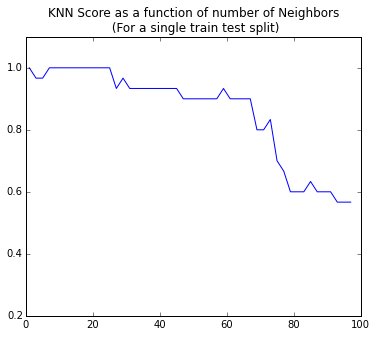

In [62]:
#Step1: Go through a list of possible values for K (1-99 or more) and calculate the model score

#We make a list of numbers from 1-99 only keeping odd values
n_neighbors = range(1,99,2)
scores = []

#Loop through each value for n and calculate the score, appending to our list
for n in n_neighbors:
   myknn = KNeighborsClassifier(n).fit(X_train,y_train)
   score = myknn.score(X_test, y_test)
   scores.append(score)


#Step 2: Put the scores and values for K in a dataframe

df = pd.DataFrame(n_neighbors, columns=['n'])
df['scores'] = scores


#Step 3: Plot them!
fig = plt.figure(figsize=(6,5))
plt.title('KNN Score as a function of number of Neighbors \n (For a single train test split)')
plt.ylim(0.2,1.1)
_=plt.plot(df.n, df.scores)


###How much do the scores vary each time you shuffle and split?


In [64]:
#Your Code here
split_num = range(1,50)
scores = []

for n in split_num:
    X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.20) 
    myknn = KNeighborsClassifier(3).fit(X_train,y_train)
    score = myknn.score(X_test, y_test)
    scores.append(score)
